In [1]:
import numpy as npy
import pandas as pd
import seaborn as sborn
import warnings as warn
import matplotlib.pyplot as plt

warn.filterwarnings("ignore")

In [2]:
df = pd.read_csv('WineQT.csv')
print(df.nunique())

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64


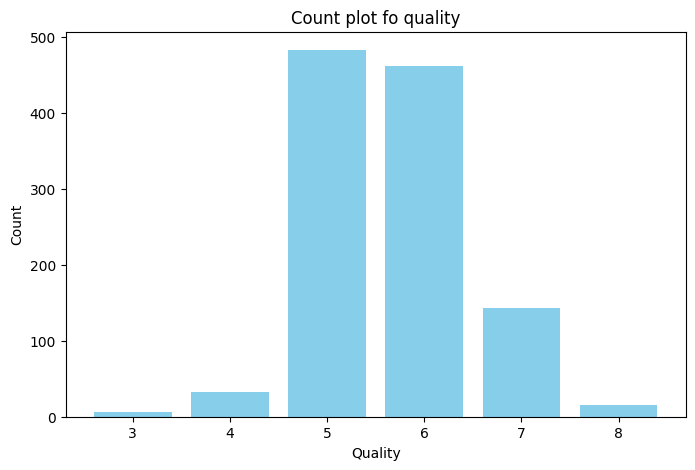

In [ ]:
# univariate analysis

quality_counts = df['quality'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(quality_counts.index, quality_counts, color='skyblue')
plt.title("Count plot for quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

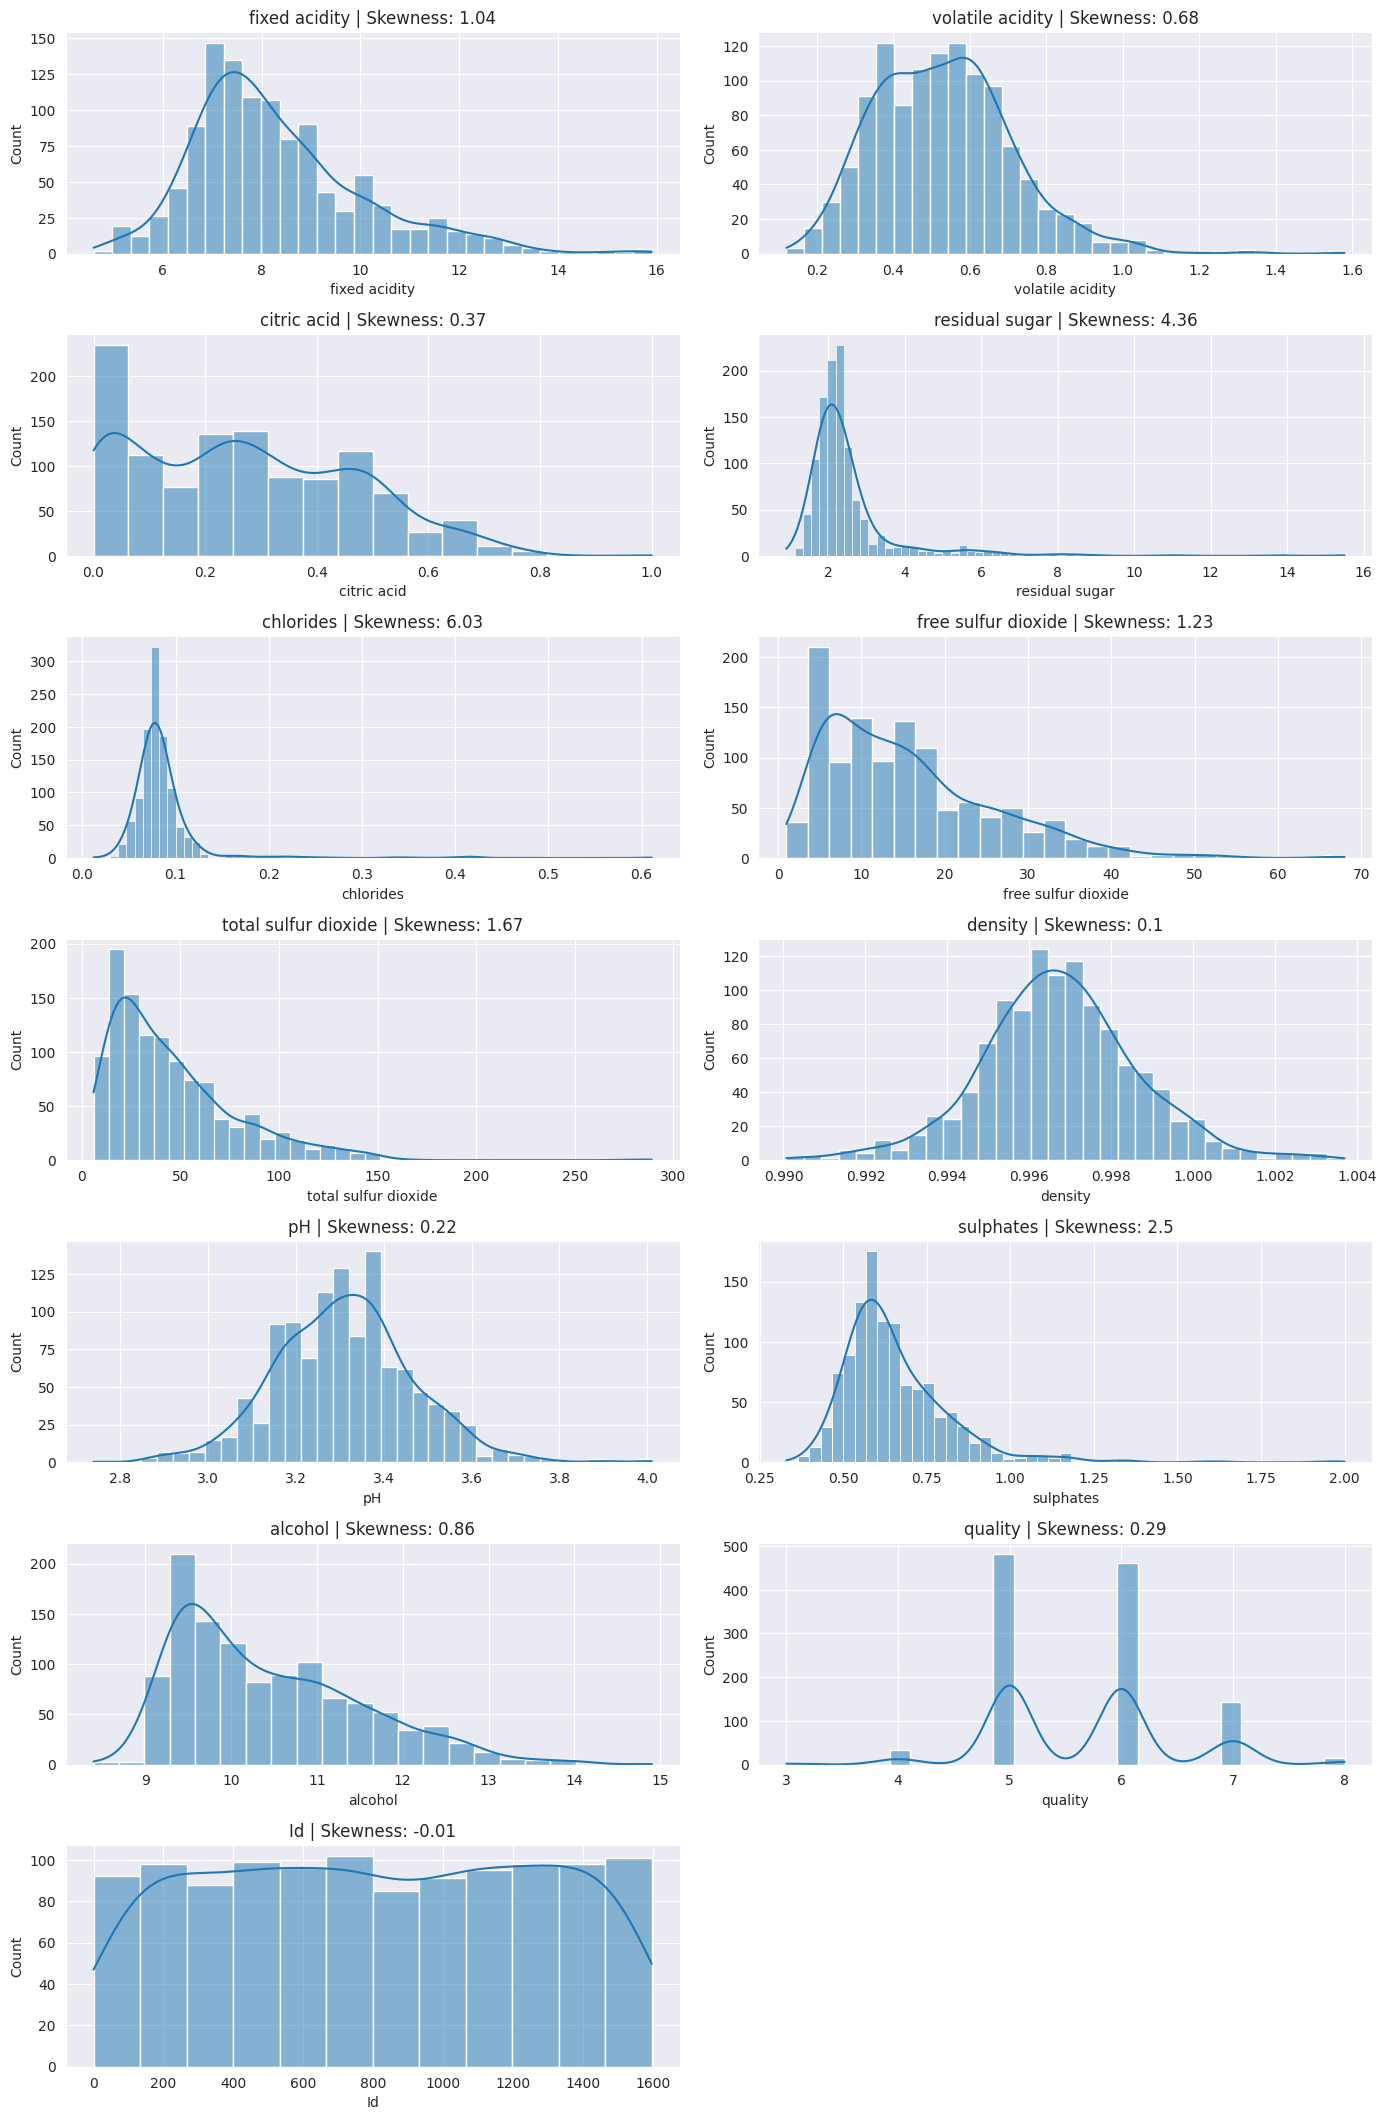

In [4]:
# Kernel density plot for variance in the dataset

sborn.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
  plt.subplot(len(numerical_columns), 2, idx)
  sborn.histplot(df[feature], kde=True)
  plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

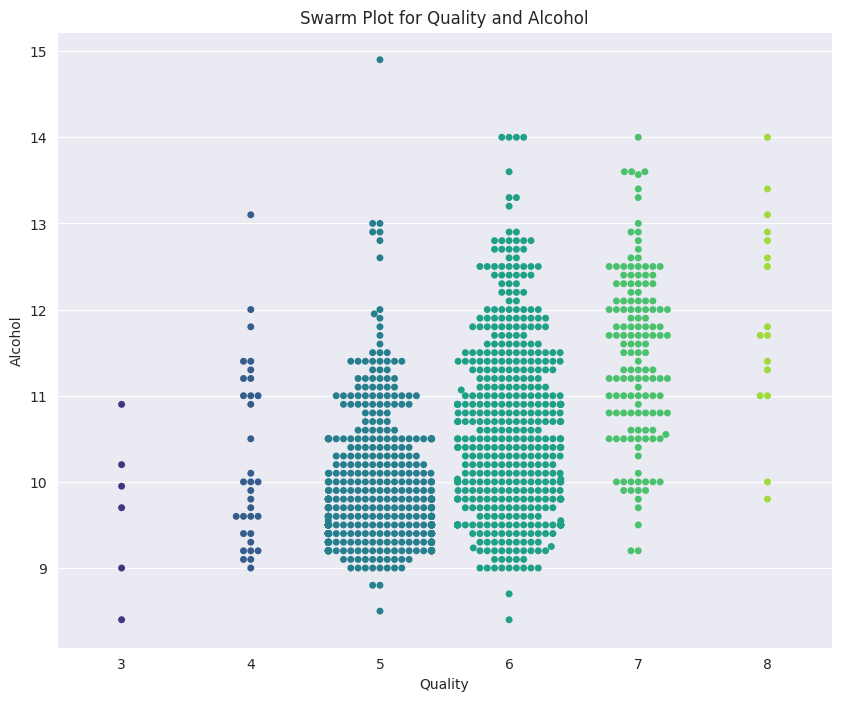

In [5]:
plt.figure(figsize=(10, 8))

sborn.swarmplot(x="quality", y="alcohol", data=df, palette='viridis')

plt.title('Swarm Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

<Figure size 1000x600 with 0 Axes>

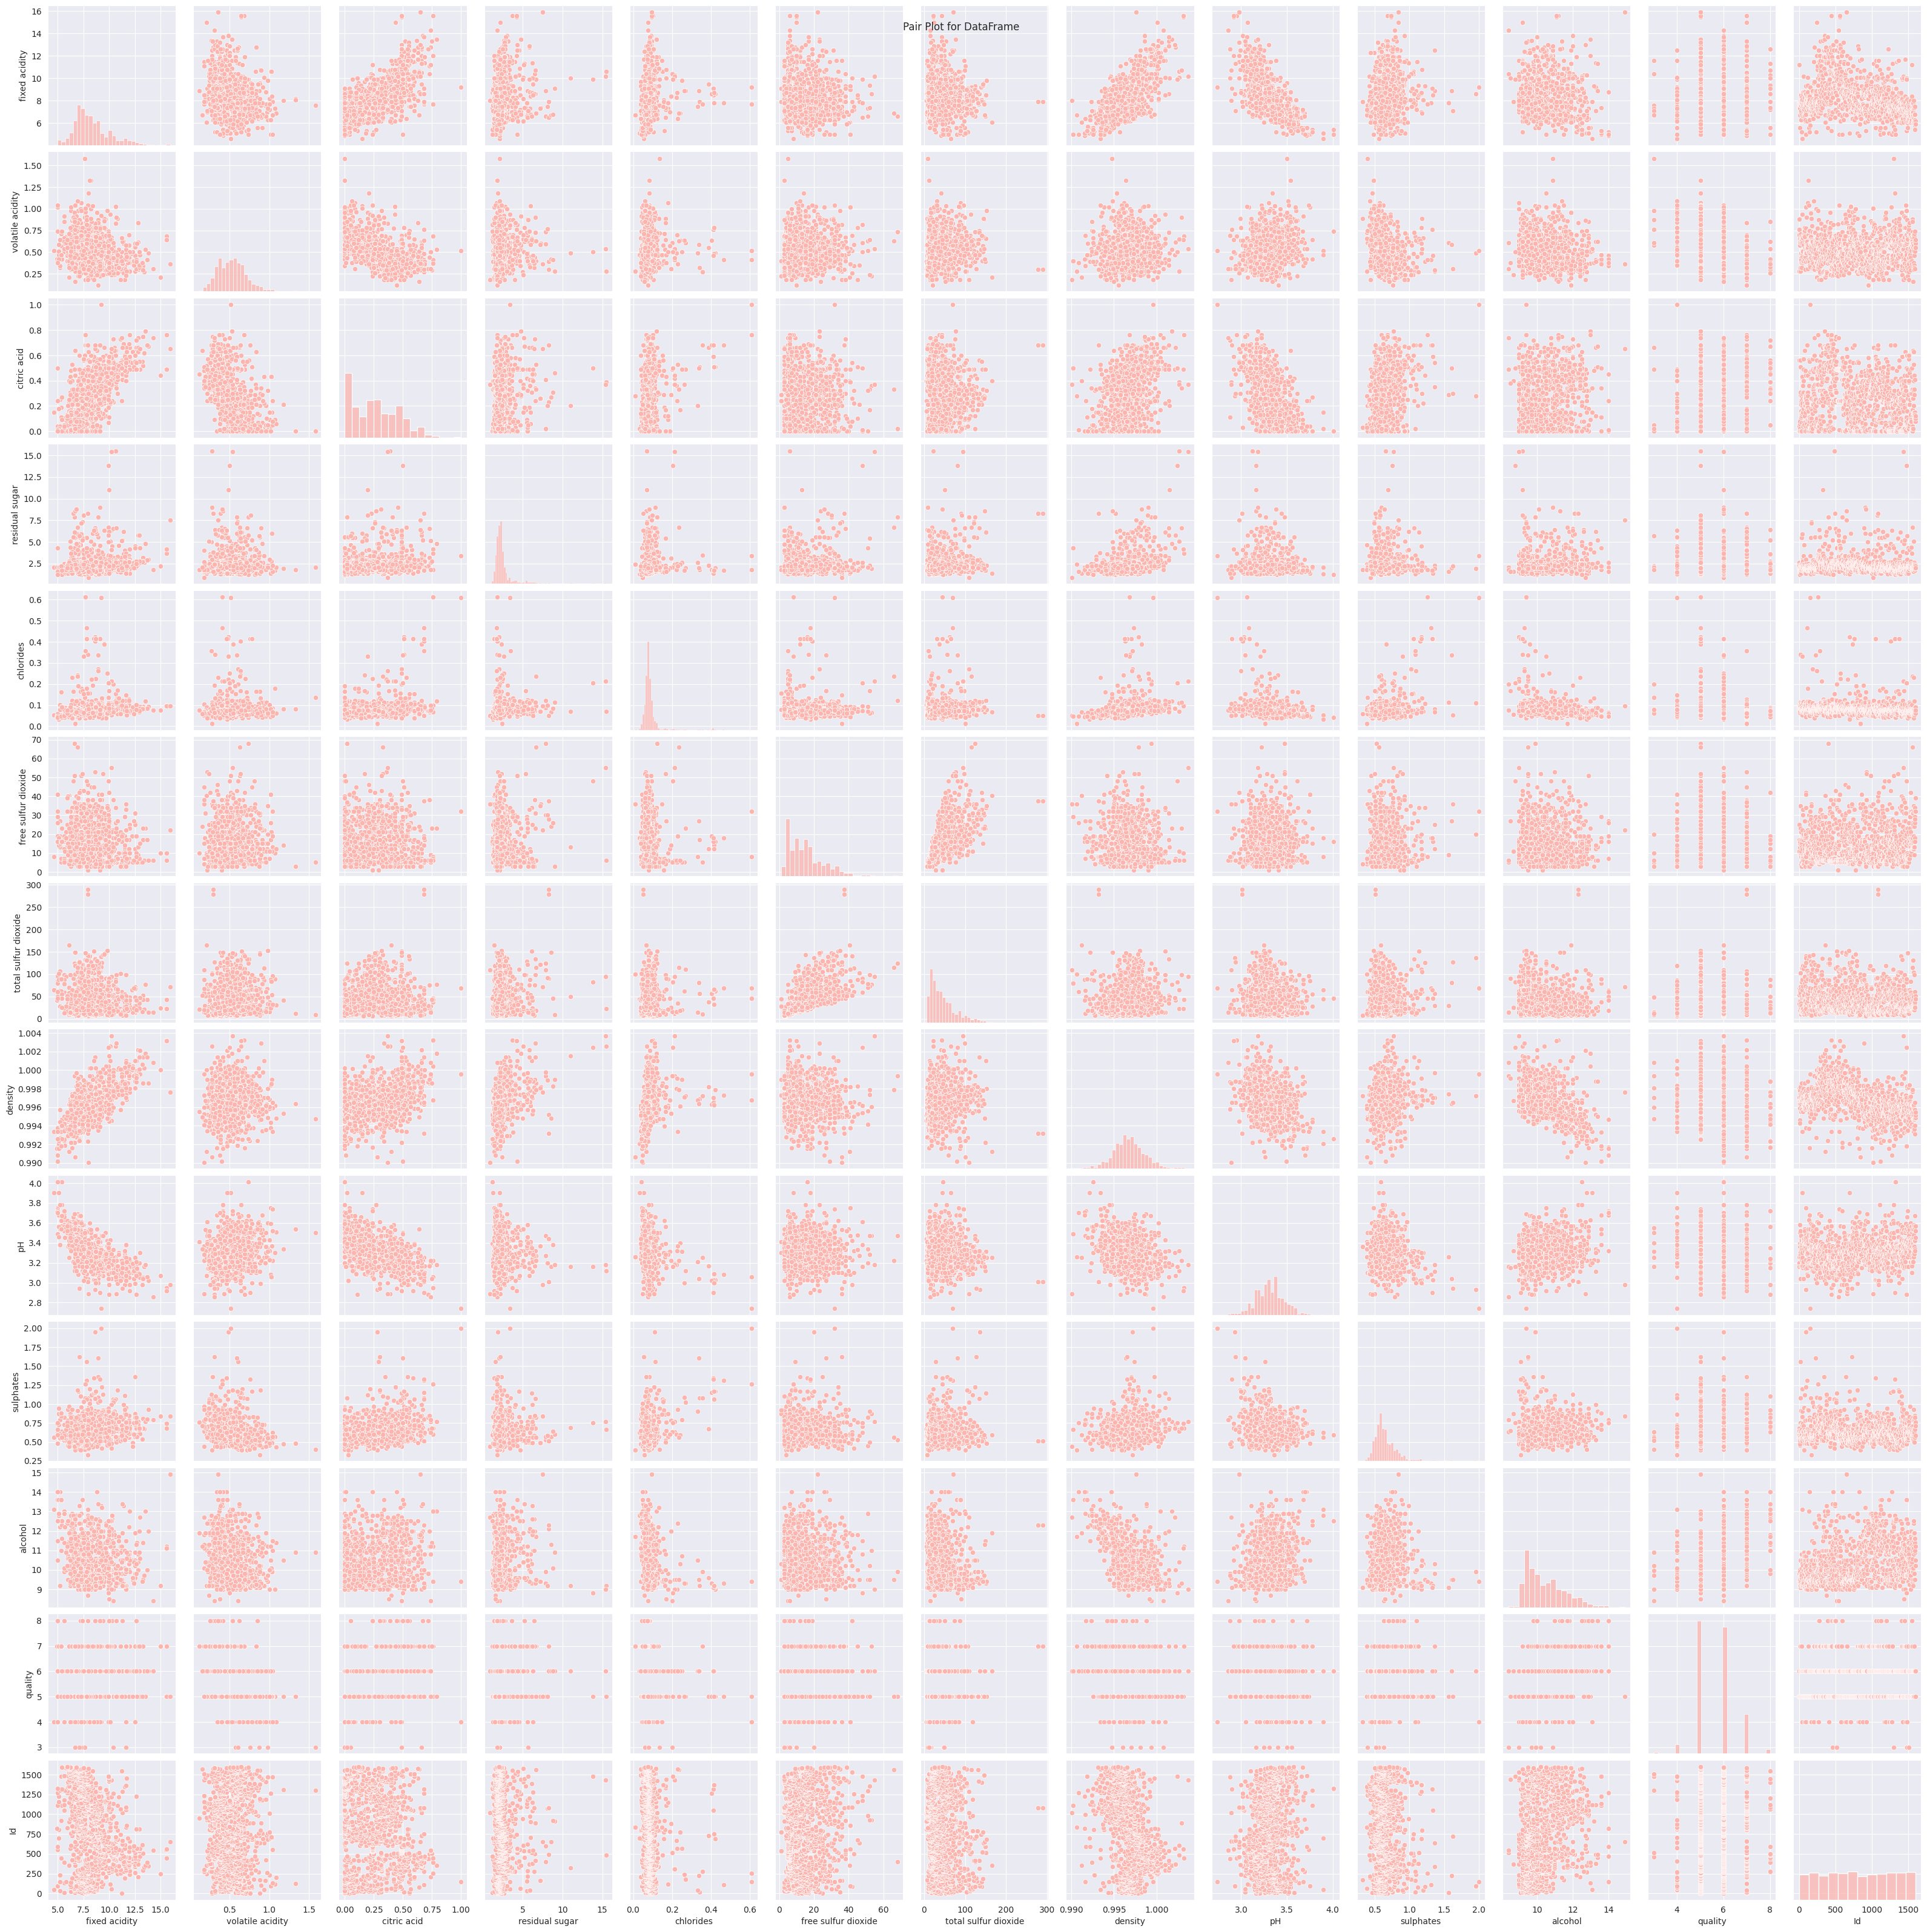

In [6]:
# Bivariate analysis

sborn.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sborn.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

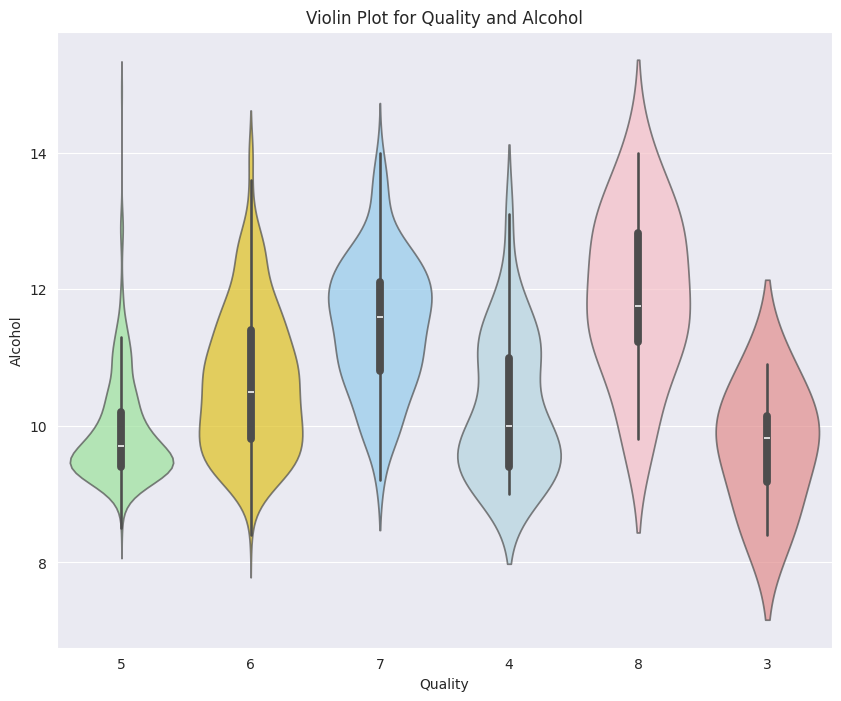

In [7]:
# violin plot for relation btw alcohol and quantity

df['quality'] = df['quality'].astype(str)  

plt.figure(figsize=(10, 8))

sborn.violinplot(x="quality", y="alcohol", data=df, palette={
  '3': 'lightcoral', '4': 'lightblue', '5': 'lightgreen', '6': 'gold', '7': 'lightskyblue', '8': 'lightpink'}, alpha=0.7)

plt.title('Violin Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

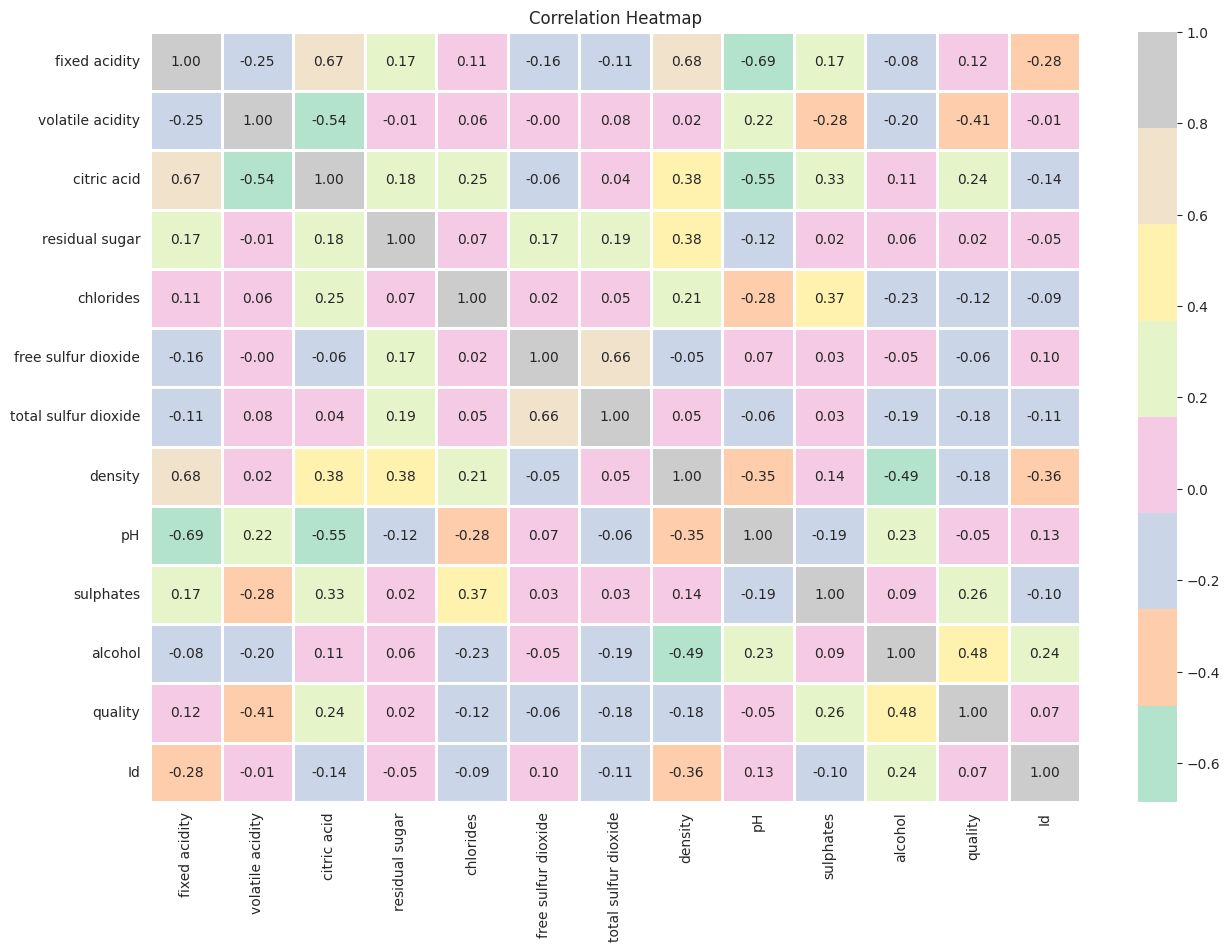

In [8]:
# Multivariate Analysis

plt.figure(figsize=(15, 10))

sborn.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()